In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
import math

#!pip install sidetable
import sidetable

In [9]:
df = pd.read_csv("./DAD 0910_5441 Sample_Class data2.csv")#reading csv, make your the folder "Data MIMIC" and the name "SERVICES.csv" match

df.head()#Define a patient’s hospital admission, 
#complete description in https://mimic.physionet.org/mimictables/admissions/

C:\Users\karen\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (46,104,108,122,126,132,134,142,143,147,169,227,228,229,230,231) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,INST,SEX,PROVPHN,ADMITDATE,INSTFROM,ADMITCAT,ENTRYCODE,ADMITBYAMB,READMIT,ERDEPTDATE,...,PROCCODE12,PROCCODE13,PROCCODE14,PROCCODE15,PROCCODE16,PROCCODE17,PROCCODE18,PROCCODE19,PROCCODE20,ASN
0,80043,M,AB,20091127,NaN,L,D,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,550073847
1,80108,M,AB,20090915,NaN,U,E,G,NaN,20090915.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,842388741
2,80120,M,AB,20090714,NaN,U,E,N,NaN,20090714.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106621181
3,80148,F,AB,20090429,NaN,L,D,N,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,333505667
4,80044,M,AB,20090415,NaN,U,E,G,NaN,20090415.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,580407841


In [10]:
#frequency table 
df.stb.freq(['SEX'])


,SEX,count,percent,cumulative_count,cumulative_percent
0,F,3295,60.558721,3295,60.558721
1,M,2146,39.441279,5441,100.000000


In [11]:
#frequency table 
df.stb.freq(['ADMITCAT'])

#PROVPHN
#L = Scheduled/elective
#U = Urgent/emergent

,ADMITCAT,count,percent,cumulative_count,cumulative_percent
0,U,3352,61.606322,3352,61.606322
1,L,2089,38.393678,5441,100.000000


In [30]:
print(df.AGE_ADMIT.mean())
print(df.AGE_ADMIT.max())
print(df.AGE_ADMIT.min())
print(df.AGE_ADMIT.std())

54.5168167616247
105
20
21.258470246423542


In [29]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['agerange'] = pd.cut(df.AGE_ADMIT, bins, labels = labels,include_lowest = True)

df.stb.freq(['agerange'])

,agerange,count,percent,cumulative_count,cumulative_percent
0,70+,1583,29.093917,1583,29.093917
1,18-29,984,18.084911,2567,47.178827
2,30-39,806,14.813453,3373,61.992281
3,50-59,737,13.545304,4110,75.537585
4,60-69,675,12.405808,4785,87.943393
5,40-49,656,12.056607,5441,100.000000


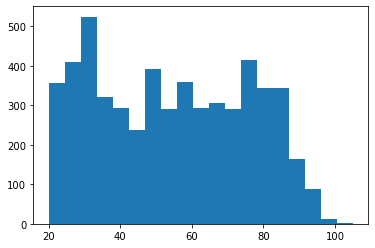

In [36]:
plt.hist(df.AGE_ADMIT, bins='auto') 
plt.show()
